In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
data = pd.read_csv('image_bins_stats_lungs2.csv')
data.shape

(2696, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_normal_1.png,5822.0,14402.0,0.0,9189.0,10538.0,0.0,11831.0,13754.0,86.982480,...,30.9217012,27.556681,26.125116,0.0,12.668177,19.678833,0.0,42.325143,33.029938,1
1,transformed_image_normal_2.png,6325.0,11758.0,0.0,10893.0,13314.0,0.0,8460.0,14786.0,86.937708,...,32.45653958,30.429971,21.410499,0.0,9.701043,16.311605,0.0,41.183742,36.344060,1
2,transformed_image_normal_3.png,5911.0,15666.0,0.0,9025.0,13587.0,0.0,8205.0,13142.0,76.833362,...,32.04297751,31.149385,23.374875,0.0,12.936013,17.187983,0.0,45.580706,35.631835,1
3,transformed_image_normal_4.png,5688.0,15515.0,0.0,8941.0,10462.0,0.0,11009.0,13921.0,73.869726,...,29.69319943,31.537897,22.614153,0.0,11.457708,15.659193,0.0,42.081886,32.843335,1
4,transformed_image_normal_5.png,6101.0,12231.0,0.0,10258.0,14797.0,0.0,7655.0,14494.0,87.165219,...,32.21430004,31.326113,21.152459,0.0,12.285766,13.344069,0.0,42.956341,36.139280,1


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,5822.0,14402.0,0.0,9189.0,10538.0,0.0,11831.0,13754.0,86.982480,4.430912,...,30.9217012,27.556681,26.125116,0.0,12.668177,19.678833,0.0,42.325143,33.029938,1
1,6325.0,11758.0,0.0,10893.0,13314.0,0.0,8460.0,14786.0,86.937708,5.183279,...,32.45653958,30.429971,21.410499,0.0,9.701043,16.311605,0.0,41.183742,36.344060,1
2,5911.0,15666.0,0.0,9025.0,13587.0,0.0,8205.0,13142.0,76.833362,2.389570,...,32.04297751,31.149385,23.374875,0.0,12.936013,17.187983,0.0,45.580706,35.631835,1
3,5688.0,15515.0,0.0,8941.0,10462.0,0.0,11009.0,13921.0,73.869726,1.710925,...,29.69319943,31.537897,22.614153,0.0,11.457708,15.659193,0.0,42.081886,32.843335,1
4,6101.0,12231.0,0.0,10258.0,14797.0,0.0,7655.0,14494.0,87.165219,5.596517,...,32.21430004,31.326113,21.152459,0.0,12.285766,13.344069,0.0,42.956341,36.139280,1


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','rskew_bins0','rskew_bins1','rskew_bins2','rskew_bins3','rskew_bins4','rskew_bins5','rskew_bins6','rskew_bins7','gstd_bins0','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,5822.0,14402.0,0.0,9189.0,10538.0,0.0,11831.0,13754.0,86.982480,4.430912,...,30.921701,27.556681,26.125116,0.000000,12.668177,19.678833,0.000000,42.325143,33.029938,1.0
1,6325.0,11758.0,0.0,10893.0,13314.0,0.0,8460.0,14786.0,86.937708,5.183279,...,32.456540,30.429971,21.410499,0.000000,9.701043,16.311605,0.000000,41.183742,36.344060,1.0
2,5911.0,15666.0,0.0,9025.0,13587.0,0.0,8205.0,13142.0,76.833362,2.389570,...,32.042978,31.149385,23.374875,0.000000,12.936013,17.187983,0.000000,45.580706,35.631835,1.0
3,5688.0,15515.0,0.0,8941.0,10462.0,0.0,11009.0,13921.0,73.869726,1.710925,...,29.693199,31.537897,22.614153,0.000000,11.457708,15.659193,0.000000,42.081886,32.843335,1.0
4,6101.0,12231.0,0.0,10258.0,14797.0,0.0,7655.0,14494.0,87.165219,5.596517,...,32.214300,31.326113,21.152459,0.000000,12.285766,13.344069,0.000000,42.956341,36.139280,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,9870.0,10436.0,13.0,9558.0,9764.0,0.0,16080.0,9815.0,104.708207,27.440974,...,28.826381,16.609479,32.541509,10.841782,18.263777,29.591836,0.000000,43.584547,43.219779,2.0
2690,5946.0,14026.0,1.0,11041.0,12415.0,0.0,7886.0,14221.0,74.044736,1.607016,...,39.246127,30.936390,21.337923,0.000000,9.706518,17.877323,0.000000,45.339391,32.611797,2.0
2691,7330.0,8408.0,6.0,10811.0,18521.0,2.0,6699.0,13759.0,112.515416,7.136774,...,28.790502,42.515393,18.625921,11.891740,14.170267,3.991819,0.000000,36.311970,41.914116,2.0
2692,7630.0,16431.0,1.0,9530.0,3413.0,3.0,17843.0,10685.0,73.122412,24.310145,...,37.426827,20.622111,29.148814,0.000000,20.197666,31.678731,4.769168,50.967873,38.781249,2.0


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1878, 104), (805, 104))

In [8]:
# determine roc-auc for each feature

# here we store the roc-auc values
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values[0:10]

[0.5852377248540069,
 0.5240471869328494,
 0.66237638431053,
 0.5300844475721322,
 0.5405447115325259,
 0.5312326382458611,
 0.535945775769473,
 0.5779041199056756,
 0.5414830178895514,
 0.5551810560884971]

Text(0, 0.5, 'roc-auc')

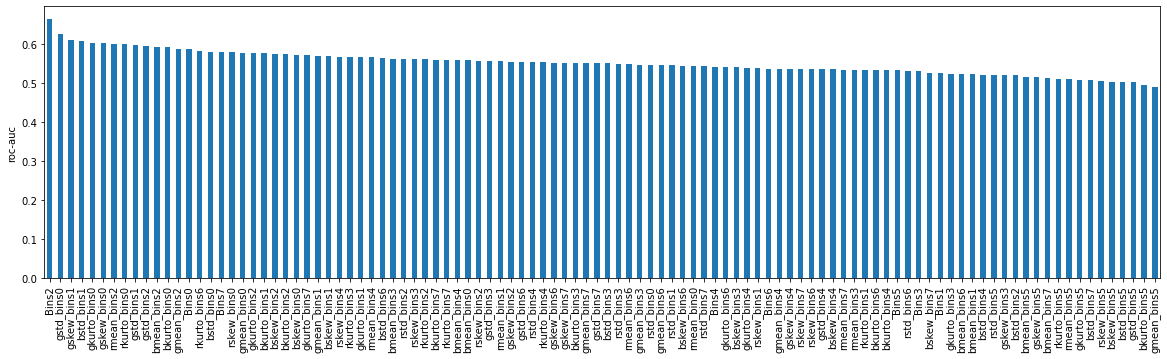

In [9]:
# now let's:

# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [14]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.57])

25

In [15]:
selected_features = roc_values[roc_values > 0.6].index

selected_features

Index(['Bins2', 'gstd_bins0', 'gskew_bins0', 'gskew_bins1', 'gkurto_bins0',
       'bstd_bins1'],
      dtype='object')

In [16]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1878, 6), (805, 6))

In [17]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [18]:
# original
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8520002495349577
Test set
Random Forests roc-auc: 0.8484141387952641
Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.79      0.77       406
         2.0       0.78      0.75      0.76       399

    accuracy                           0.77       805
   macro avg       0.77      0.77      0.77       805
weighted avg       0.77      0.77      0.77       805

Confusion Matrix:
[[320  86]
 [100 299]]
Metrics:
Accuracy: 0.769
F1 Score: 0.775
Precision: 0.762
Recall: 0.788
After Cross Validation:
Accuracy: 74.23 %
Standard Deviation: 3.27 %


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [20]:
run_logistic(X_train, X_test, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7557892110158341
Test set
Logistic Regression roc-auc: 0.7972147116559872
Classification Report:
              precision    recall  f1-score   support

         1.0       0.70      0.84      0.77       406
         2.0       0.80      0.64      0.71       399

    accuracy                           0.74       805
   macro avg       0.75      0.74      0.74       805
weighted avg       0.75      0.74      0.74       805

Confusion Matrix:
[[343  63]
 [145 254]]
Metrics:
Accuracy: 0.742
F1 Score: 0.767
Precision: 0.703
Recall: 0.845
After Cross Validation:
Accuracy: 71.30 %
Standard Deviation: 3.36 %


In [21]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [22]:
run_kernel_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.7416292364230299
Test set
Kernel SVM roc-auc: 0.7821215600577798
Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.85      0.78       406
         2.0       0.82      0.67      0.74       399

    accuracy                           0.76       805
   macro avg       0.77      0.76      0.76       805
weighted avg       0.77      0.76      0.76       805

Confusion Matrix:
[[346  60]
 [130 269]]
Metrics:
Accuracy: 0.764
F1 Score: 0.785
Precision: 0.727
Recall: 0.852
After Cross Validation:
Accuracy: 72.95 %
Standard Deviation: 3.25 %


In [23]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [24]:
run_knn(X_train, X_test, y_train, y_test)

Train set
KNN roc-auc: 0.5805430788076766
Test set
KNN roc-auc: 0.5928861562773929
Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.83      0.78       406
         2.0       0.80      0.69      0.74       399

    accuracy                           0.76       805
   macro avg       0.76      0.76      0.76       805
weighted avg       0.76      0.76      0.76       805

Confusion Matrix:
[[336  70]
 [125 274]]
Metrics:
Accuracy: 0.758
F1 Score: 0.775
Precision: 0.729
Recall: 0.828
After Cross Validation:
Accuracy: 73.16 %
Standard Deviation: 4.31 %


In [25]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(X_train)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(X_test)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [26]:
run_decision_tree(X_train, X_test, y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.6782905539711347
Classification Report:
              precision    recall  f1-score   support

         1.0       0.68      0.67      0.68       406
         2.0       0.67      0.68      0.68       399

    accuracy                           0.68       805
   macro avg       0.68      0.68      0.68       805
weighted avg       0.68      0.68      0.68       805

Confusion Matrix:
[[274 132]
 [127 272]]
Metrics:
Accuracy: 0.678
F1 Score: 0.679
Precision: 0.683
Recall: 0.675
After Cross Validation:
Accuracy: 65.87 %
Standard Deviation: 2.84 %


In [27]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [28]:
run_naive_bayes(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.91      0.77       406
         2.0       0.86      0.54      0.66       399

    accuracy                           0.73       805
   macro avg       0.76      0.72      0.71       805
weighted avg       0.76      0.73      0.72       805

Confusion Matrix:
[[370  36]
 [185 214]]
Metrics:
Accuracy: 0.725
F1 Score: 0.770
Precision: 0.667
Recall: 0.911
After Cross Validation:
Accuracy: 71.30 %
Standard Deviation: 3.06 %


In [29]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [30]:
run_linear_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.7594914023864616
Test set
Kernel SVM roc-auc: 0.8047149894440535
Classification Report:
              precision    recall  f1-score   support

         1.0       0.70      0.86      0.77       406
         2.0       0.82      0.62      0.71       399

    accuracy                           0.74       805
   macro avg       0.76      0.74      0.74       805
weighted avg       0.76      0.74      0.74       805

Confusion Matrix:
[[350  56]
 [151 248]]
Metrics:
Accuracy: 0.743
F1 Score: 0.772
Precision: 0.699
Recall: 0.862
After Cross Validation:
Accuracy: 70.82 %
Standard Deviation: 3.13 %
